In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import matplotlib.pyplot as plt
import plotly.express as plotly
from datetime import datetime
from sklearn.preprocessing import MaxAbsScaler

In [2]:
path_rawdata    = 'F://TFG//datasets/raw_datasets//'
path_train      = 'F://TFG//datasets//data_train//'
path_footdata   ='F:\\TFG\\datasets\\football-data\\'
path_graphs = 'F://TFG//graphs//'
path_eda = path_graphs + 'eda//'

In [3]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')
dateparse2 = lambda x: datetime.strptime(x, '%d/%m/%Y')

# data = pd.read_csv(path_rawdata+'historical.csv',sep=';',decimal=',',index_col='matchId') 
data = pd.read_csv(path_rawdata+'historical_goals.csv',sep=';',decimal=',',index_col='matchId',parse_dates=['Date'],date_parser=dateparse) 
fdata_allseasons = pd.read_csv(path_rawdata+'fdata_allseasons.csv',sep=';')

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
str_season = { s:str(s).zfill(4) for s in data.season.unique()}
str_season20 = {k:f'20{s[:2]}-{s[2:]}' for k,s in str_season.items() if not s.startswith('9')}
str_season19 = {k:f'19{s[:2]}-{s[2:]}' for k,s in str_season.items() if s.startswith('9')}
str_season = {**str_season19,**str_season20}
str_season

{9394: '1993-94',
 9495: '1994-95',
 9596: '1995-96',
 9697: '1996-97',
 9798: '1997-98',
 9899: '1998-99',
 9900: '1999-00',
 1: '2000-01',
 102: '2001-02',
 203: '2002-03',
 405: '2004-05',
 607: '2006-07',
 708: '2007-08',
 809: '2008-09',
 910: '2009-10',
 1011: '2010-11',
 1112: '2011-12',
 1213: '2012-13',
 1314: '2013-14',
 1415: '2014-15',
 1516: '2015-16',
 1617: '2016-17',
 1718: '2017-18',
 1819: '2018-19',
 1920: '2019-20',
 2021: '2020-21',
 304: '2003-04',
 506: '2005-06'}

##### Time Series: distribucion de victorias y empates

In [48]:
results = data[["Div","Date","HomeTeam","AwayTeam","FTR","season"]]
results['season'] = results.season.map(str_season)
results.sort_values('Date')

<ipython-input-48-57301156f310>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Div,Date,HomeTeam,AwayTeam,FTR,season
matchId,,,,,,
27633,D1,1993-08-07,M'Gladbach,Ein Frankfurt,2,1993-94
27627,D1,1993-08-07,Bayern Munich,Freiburg,1,1993-94
27628,D1,1993-08-07,Dortmund,Karlsruhe,1,1993-94
27629,D1,1993-08-07,Duisburg,Leverkusen,0,1993-94
27630,D1,1993-08-07,FC Koln,Kaiserslautern,2,1993-94
...,...,...,...,...,...,...
18309,SP1,2021-05-23,Granada,Getafe,0,2020-21
18310,SP1,2021-05-23,Sevilla,Alaves,1,2020-21
48331,F1,2021-05-23,Rennes,Nimes,1,2020-21


In [49]:
results_grouped = results.groupby(['Div','season','FTR']).Date.count().reset_index()

aux = results_grouped.groupby(['Div','season']).Date.sum().to_frame()
aux.columns = ['Total']
results_grouped = results_grouped.set_index(['Div','season']).join(aux)
results_grouped['Perc'] = results_grouped.Date * 100 / results_grouped.Total
results_grouped = results_grouped.reset_index()
results_grouped

,Div,season,FTR,Date,Total,Perc
0,D1,1993-94,0,83,306,27.124183
1,D1,1993-94,1,152,306,49.673203
2,D1,1993-94,2,71,306,23.202614
3,D1,1994-95,0,86,306,28.104575
4,D1,1994-95,1,147,306,48.039216
...,...,...,...,...,...,...
376,SP1,2019-20,1,174,380,45.789474
377,SP1,2019-20,2,101,380,26.578947
378,SP1,2020-21,0,109,380,28.684211
379,SP1,2020-21,1,158,380,41.578947


D1
0 0 2
I1
0 2 4
SP1
0 4 6
E0
1 0 2
F1
1 2 4


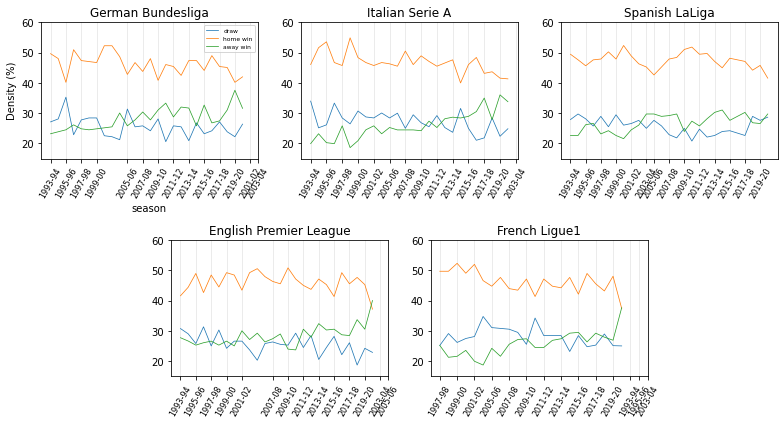

In [50]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2,6)
f = plt.figure(figsize=(11,6))
dict_res = {0:'draw',1:'home win',2:'away win'}
season_list = sorted(results_grouped.season.unique())
results_grouped = results_grouped.sort_values('season')

dict_league = {'E0':'English Premier League', 'D1':'German Bundesliga', 'SP1':'Spanish LaLiga', 'F1':'French Ligue1', 'I1':'Italian Serie A'}
# plt.suptitle('Results time series in every league',fontsize=20)

for i,league in enumerate(results_grouped.Div.unique()):
    print(league)
    print(int(i/3),(i%3)*2,(i%3)*2+2)
    j = 0 if i<3 else 1
    ax = plt.subplot(gs[int(i/3), (i%3)*2+j:(i%3)*2+2+j])
    for res in [0,1,2]:
        mask = (results_grouped.Div==league) & (results_grouped.FTR==res)
        sns.lineplot(data=results_grouped[mask],x='season',y='Perc',linewidth=.75,label=dict_res[res],legend=None)
        if i==0: 
            ax.legend(prop={'size':6})
            ax.set_ylabel("Density (%)")
        else: 
            ax.set_ylabel("")
            ax.set_xlabel("")

    ax.set_xticks(ticks=season_list[::2])
    ax.set_xticklabels(labels=season_list[::2],rotation=60,fontsize=8)

    ax.set_title(f'{dict_league[league]}')
    ax.grid(axis='x',alpha=.3)
    ax.set_ylim(15,60)

plt.tight_layout()
# plt.savefig(path_eda+'timeseries_results_leagues.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Distribution: goles en cada liga

In [5]:
goles = data[['Div', 'season','Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
goles['goals'] = goles.FTHG + goles.FTAG
goles

<ipython-input-5-672eec8b573f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goles['goals'] = goles.FTHG + goles.FTAG


,Div,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,goals
matchId,,,,,,,,
0,E0,1,2000-08-19,Charlton,Man City,4.0,0.0,4.0
1,E0,1,2000-08-19,Chelsea,West Ham,4.0,2.0,6.0
2,E0,1,2000-08-19,Coventry,Middlesbrough,1.0,3.0,4.0
3,E0,1,2000-08-19,Derby,Southampton,2.0,2.0,4.0
4,E0,1,2000-08-19,Leeds,Everton,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...
49493,F1,9900,2000-05-13,Nancy,Auxerre,2.0,0.0,2.0
49494,F1,9900,2000-05-13,Rennes,Metz,2.0,0.0,2.0
49495,F1,9900,2000-05-13,Sedan,Marseille,2.0,2.0,4.0


In [6]:
# get the match round

data_aux = data.reset_index()[['matchId','Div','HomeTeam','AwayTeam','Date','season']].melt(['matchId','Div','Date','season'])
data_round = data_aux.sort_values('Date',ascending=True).groupby(['Div','season','value']).Date.rank()

data_aux['rank'] = data_round
round_dict = data_aux[['matchId','rank']].set_index('matchId').to_dict()
goles["round"] = goles.index.map(round_dict['rank'])
goles

<ipython-input-6-66e3e46bb713>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  goles["round"] = goles.index.map(round_dict['rank'])


,Div,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,goals,round
matchId,,,,,,,,,
0,E0,1,2000-08-19,Charlton,Man City,4.0,0.0,4.0,1.0
1,E0,1,2000-08-19,Chelsea,West Ham,4.0,2.0,6.0,1.0
2,E0,1,2000-08-19,Coventry,Middlesbrough,1.0,3.0,4.0,1.0
3,E0,1,2000-08-19,Derby,Southampton,2.0,2.0,4.0,1.0
4,E0,1,2000-08-19,Leeds,Everton,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
49493,F1,9900,2000-05-13,Nancy,Auxerre,2.0,0.0,2.0,34.0
49494,F1,9900,2000-05-13,Rennes,Metz,2.0,0.0,2.0,34.0
49495,F1,9900,2000-05-13,Sedan,Marseille,2.0,2.0,4.0,34.0


In [7]:
goles_cum = goles.sort_values('round').groupby(['Div','season']).expanding().agg({"goals":"sum", "round":"max"})
goles_cum = goles_cum.groupby(['Div','season','round']).max()
goles_cum = goles_cum.reset_index()
goles_cum

,Div,season,round,goals
0,D1,1,1.0,27.0
1,D1,1,2.0,62.0
2,D1,1,3.0,87.0
3,D1,1,4.0,106.0
4,D1,1,5.0,135.0
...,...,...,...,...
4657,SP1,9900,34.0,898.0
4658,SP1,9900,35.0,926.0
4659,SP1,9900,36.0,955.0
4660,SP1,9900,37.0,974.0


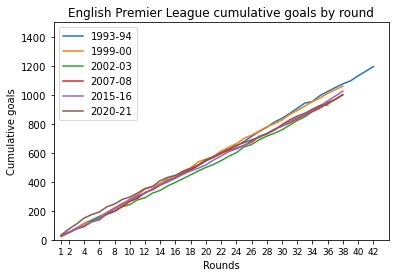

In [9]:
for temp,strtemp in zip([9394, 9900, 203,708,1516,2021],['1993-94','1999-00','2002-03','2007-08','2015-16','2020-21']):
    mask = (goles_cum.Div=='E0') & (goles_cum.season == temp)
    goles_cum[mask].groupby('round').goals.sum().plot(label=strtemp)
plt.legend()
plt.xlabel('Rounds'), plt.ylabel('Cumulative goals')
plt.xticks([1,*np.arange(2,44,2)],fontsize=9)
plt.xlim(0,44), plt.ylim(0,1500)
plt.title('English Premier League cumulative goals by round')
plt.savefig(path_eda+'timeseries_rounds_goals.jpg',format='jpg', dpi=200, bbox_inches='tight')

In [55]:
goles.Date.max()

Timestamp('2021-05-23 00:00:00')

In [56]:
goles

,Div,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,goals,round
matchId,,,,,,,,,
0,E0,1,2000-08-19,Charlton,Man City,4.0,0.0,4.0,1.0
1,E0,1,2000-08-19,Chelsea,West Ham,4.0,2.0,6.0,1.0
2,E0,1,2000-08-19,Coventry,Middlesbrough,1.0,3.0,4.0,1.0
3,E0,1,2000-08-19,Derby,Southampton,2.0,2.0,4.0,1.0
4,E0,1,2000-08-19,Leeds,Everton,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
49493,F1,9900,2000-05-13,Nancy,Auxerre,2.0,0.0,2.0,34.0
49494,F1,9900,2000-05-13,Rennes,Metz,2.0,0.0,2.0,34.0
49495,F1,9900,2000-05-13,Sedan,Marseille,2.0,2.0,4.0,34.0


In [57]:
goles

,Div,season,Date,HomeTeam,AwayTeam,FTHG,FTAG,goals,round
matchId,,,,,,,,,
0,E0,1,2000-08-19,Charlton,Man City,4.0,0.0,4.0,1.0
1,E0,1,2000-08-19,Chelsea,West Ham,4.0,2.0,6.0,1.0
2,E0,1,2000-08-19,Coventry,Middlesbrough,1.0,3.0,4.0,1.0
3,E0,1,2000-08-19,Derby,Southampton,2.0,2.0,4.0,1.0
4,E0,1,2000-08-19,Leeds,Everton,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
49493,F1,9900,2000-05-13,Nancy,Auxerre,2.0,0.0,2.0,34.0
49494,F1,9900,2000-05-13,Rennes,Metz,2.0,0.0,2.0,34.0
49495,F1,9900,2000-05-13,Sedan,Marseille,2.0,2.0,4.0,34.0


##### Time Series: evolucion de puntos (y) de los equipos por temporada (x).

Queremos ver que ligas estan mas igualadas y regulares.

In [58]:
puntos = data.reset_index()[["Div","matchId","HomeTeam",'AwayTeam',"FTR","season","Date"]]
# puntos = puntos[puntos.Div=='E0']
puntos = puntos.melt(['matchId','season','Date','Div','FTR'],['HomeTeam','AwayTeam'])
get_puntos = lambda x: {0:1, 1:3, 2:0}[puntos.loc[x].FTR] if puntos.loc[x].variable=="HomeTeam" else {0:1, 1:0, 2:3}[puntos.loc[x].FTR]
puntos["puntos"] = puntos.index.map(get_puntos)
puntos = puntos.drop(columns='FTR').sort_values('Date')
puntos.columns = ['matchId','season','Date','Div','side','team','puntos']
puntos['season'] = puntos.season.map(str_season)
puntos

,matchId,season,Date,Div,side,team,puntos
26234,27627,1993-94,1993-08-07,D1,HomeTeam,Bayern Munich,3
71625,27635,1993-94,1993-08-07,D1,AwayTeam,Stuttgart,0
71624,27634,1993-94,1993-08-07,D1,AwayTeam,Schalke 04,0
71623,27633,1993-94,1993-08-07,D1,AwayTeam,Ein Frankfurt,3
71622,27632,1993-94,1993-08-07,D1,AwayTeam,Dresden,1
...,...,...,...,...,...,...,...
89841,48327,2020-21,2021-05-23,F1,AwayTeam,Nice,3
89842,48328,2020-21,2021-05-23,F1,AwayTeam,Marseille,1
89843,48329,2020-21,2021-05-23,F1,AwayTeam,Montpellier,3
44455,48324,2020-21,2021-05-23,F1,HomeTeam,Angers,0


In [59]:
puntos_grouped = puntos.groupby(['team','season','Div']).puntos.sum().reset_index().sort_values(['team','season'])
puntos_grouped

,team,season,Div,puntos
0,Aachen,2007-08,D1,34
1,Ajaccio,2004-05,F1,45
2,Ajaccio,2005-06,F1,33
3,Ajaccio,2011-12,F1,41
4,Ajaccio,2012-13,F1,42
...,...,...,...,...
2461,Zaragoza,2007-08,SP1,42
2462,Zaragoza,2009-10,SP1,41
2463,Zaragoza,2010-11,SP1,45
2464,Zaragoza,2011-12,SP1,43


In [60]:
puntos_grouped['rank'] = puntos_grouped[['season','Div','puntos']].groupby(['season','Div']).puntos.rank(method='first',ascending=False)
puntos_grouped

,team,season,Div,puntos,rank
0,Aachen,2007-08,D1,34,16.0
1,Ajaccio,2004-05,F1,45,14.0
2,Ajaccio,2005-06,F1,33,18.0
3,Ajaccio,2011-12,F1,41,15.0
4,Ajaccio,2012-13,F1,42,15.0
...,...,...,...,...,...
2461,Zaragoza,2007-08,SP1,42,18.0
2462,Zaragoza,2009-10,SP1,41,14.0
2463,Zaragoza,2010-11,SP1,45,15.0
2464,Zaragoza,2011-12,SP1,43,16.0


In [61]:
teams = puntos_grouped.team.unique()
teamseasons = pd.DataFrame({'team':teams,'season':[season_list]*len(teams)})
teamseasons = teamseasons.explode('season').reset_index().set_index(['team','season'])
puntos_exploded = teamseasons.merge(puntos_grouped[['team','season','rank']],left_index=True,right_on=['team','season'],how='left')
puntos_exploded = puntos_exploded.merge(puntos_grouped[['team','Div']].drop_duplicates(),left_on='team',right_on='team',how='left')
puntos_exploded

,index,team,season,rank,Div
0,0,Aachen,1993-94,NaN,D1
1,0,Aachen,1994-95,NaN,D1
2,0,Aachen,1995-96,NaN,D1
3,0,Aachen,1996-97,NaN,D1
4,0,Aachen,1997-98,NaN,D1
...,...,...,...,...,...
6547,233,Zaragoza,2016-17,NaN,SP1
6548,233,Zaragoza,2017-18,NaN,SP1
6549,233,Zaragoza,2018-19,NaN,SP1
6550,233,Zaragoza,2019-20,NaN,SP1


In [62]:
puntos_exploded[puntos_exploded.team=='Sociedad']

,index,team,season,rank,Div
5320,190,Sociedad,1993-94,13.0,SP1
5321,190,Sociedad,1994-95,11.0,SP1
5322,190,Sociedad,1995-96,7.0,SP1
5323,190,Sociedad,1996-97,8.0,SP1
5324,190,Sociedad,1997-98,4.0,SP1
5325,190,Sociedad,1998-99,10.0,SP1
5326,190,Sociedad,1999-00,14.0,SP1
5327,190,Sociedad,2000-01,13.0,SP1
5328,190,Sociedad,2001-02,14.0,SP1
5329,190,Sociedad,2002-03,2.0,SP1


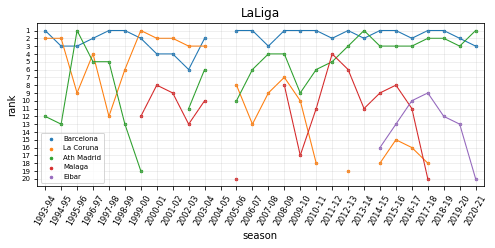

In [63]:
plt.figure(figsize=(8,3))
maskaux = puntos_exploded.Div=='SP1'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
teams = ['Barcelona','La Coruna','Ath Madrid','Malaga','Eibar']
# teams = puntos_exploded[maskaux].team.unique()[:5]
handles = []
for c,team in zip(colors,teams):
    mask = maskaux & (puntos_exploded.team==team)
    plaliga = sns.pointplot(data=puntos_exploded[mask],x='season',y='rank',hue='team',scale=.4,palette=dict(zip(teams,colors)))
plt.yticks(ticks=np.arange(1,21),labels=np.arange(1,21),fontsize=7)
plt.xticks(rotation=60,fontsize=8)
plt.title('LaLiga')
plt.gca().invert_yaxis()
plt.legend(prop={'size':7})
plt.grid(alpha=.25)
# plt.savefig(path_eda+'timeseries_rank_laliga.jpg',format='jpg', dpi=200, bbox_inches='tight')

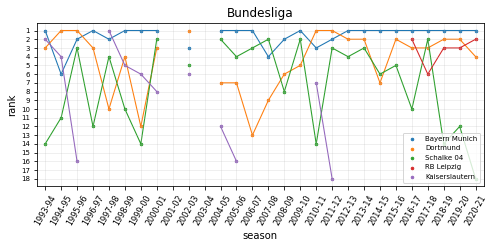

In [64]:
plt.figure(figsize=(8,3))
maskaux = puntos_exploded.Div=='D1'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
teams = ['Bayern Munich','Dortmund','Schalke 04','RB Leipzig','Kaiserslautern']
# teams = puntos_exploded[maskaux].team.unique()[:5]
handles = []
for c,team in zip(colors,teams):
    mask = maskaux & (puntos_exploded.team==team)
    pbundes = sns.pointplot(data=puntos_exploded[mask],x='season',y='rank',hue='team',scale=.4,palette=dict(zip(teams,colors)))
plt.yticks(ticks=np.arange(1,19),labels=np.arange(1,19),fontsize=7)
plt.xticks(rotation=60,fontsize=8)
plt.title('Bundesliga')
plt.gca().invert_yaxis()
plt.legend(prop={'size':7})
plt.grid(alpha=.25)
# plt.savefig(path_eda+'timeseries_rank_bundesliga.jpg',format='jpg', dpi=200, bbox_inches='tight')

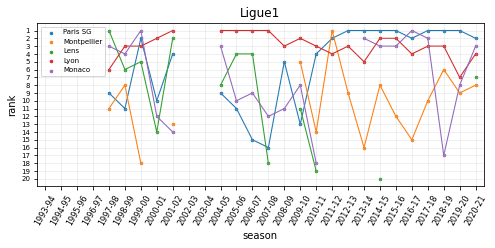

In [65]:
plt.figure(figsize=(8,3))
maskaux = puntos_exploded.Div=='F1'
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
teams = ['Paris SG','Montpellier','Lens','Lyon','Monaco']
# teams = puntos_exploded[maskaux].team.unique()[:5]
handles = []
for c,team in zip(colors,teams):
    mask = maskaux & (puntos_exploded.team==team)
    plig1 = sns.pointplot(data=puntos_exploded[mask],x='season',y='rank',hue='team',scale=.4,palette=dict(zip(teams,colors)))
plt.yticks(ticks=np.arange(1,21),labels=np.arange(1,21),fontsize=7)
plt.xticks(rotation=60,fontsize=8)
plt.title('Ligue1')
plt.gca().invert_yaxis()
plt.legend(prop={'size':7})
plt.grid(alpha=.25)
# plt.savefig(path_eda+'timeseries_rank_ligue1.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Scatter plot: style of playing given passes and faults

In [66]:
data = pd.read_csv(path_rawdata+'historical.csv',sep=';',decimal=',',index_col='matchId',parse_dates=['Date'],date_parser=dateparse) 
data = data[['season','Date','Div','HomeTeam', 'AwayTeam','HS', 'AS','HF', 'AF','FTR']].reset_index()
data['season'] = data.season.map(str_season)
data

,matchId,season,Date,Div,HomeTeam,AwayTeam,HS,AS,HF,AF,FTR
0,0,2000-01,2000-08-19,E0,Charlton,Man City,17.0,8.0,13.0,12.0,1
1,1,2000-01,2000-08-19,E0,Chelsea,West Ham,17.0,12.0,19.0,14.0,1
2,2,2000-01,2000-08-19,E0,Coventry,Middlesbrough,6.0,16.0,15.0,21.0,2
3,3,2000-01,2000-08-19,E0,Derby,Southampton,6.0,13.0,11.0,13.0,0
4,4,2000-01,2000-08-19,E0,Leeds,Everton,17.0,12.0,21.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
29706,48329,2020-21,2021-05-23,F1,Nantes,Montpellier,15.0,8.0,8.0,11.0,2
29707,48330,2020-21,2021-05-23,F1,Reims,Bordeaux,10.0,12.0,11.0,6.0,2
29708,48331,2020-21,2021-05-23,F1,Rennes,Nimes,13.0,9.0,11.0,10.0,1
29709,48332,2020-21,2021-05-23,F1,St Etienne,Dijon,19.0,10.0,13.0,10.0,2


In [67]:
key_cols = ['matchId','season','Date','Div']
melt_side = data.melt(key_cols,['HomeTeam','AwayTeam'],var_name='side',value_name='team').drop(['side'],axis=1)
melt_shots = data.melt(key_cols,['HS','AS'],var_name='side',value_name='shots').drop([*key_cols,'side'],axis=1)
melt_fouls = data.melt(key_cols,['HF','AF'],var_name='side',value_name='faults').drop([*key_cols,'side'],axis=1)

assert len(melt_side) == len(melt_shots) == len(melt_fouls) 
style = pd.concat([melt_side,melt_shots,melt_fouls],axis=1)
style

,matchId,season,Date,Div,team,shots,faults
0,0,2000-01,2000-08-19,E0,Charlton,17.0,13.0
1,1,2000-01,2000-08-19,E0,Chelsea,17.0,19.0
2,2,2000-01,2000-08-19,E0,Coventry,6.0,15.0
3,3,2000-01,2000-08-19,E0,Derby,6.0,11.0
4,4,2000-01,2000-08-19,E0,Leeds,17.0,21.0
...,...,...,...,...,...,...,...
59417,48329,2020-21,2021-05-23,F1,Montpellier,8.0,11.0
59418,48330,2020-21,2021-05-23,F1,Bordeaux,12.0,6.0
59419,48331,2020-21,2021-05-23,F1,Nimes,9.0,10.0
59420,48332,2020-21,2021-05-23,F1,Dijon,10.0,10.0


In [68]:
# style = style.merge(puntos_grouped.reset_index()[['matchId','team','rank']],on=['matchId','team'])
# style

In [69]:
style_grouped = style.groupby(['Div','season','team']).agg({'shots':'sum','faults':'sum'}).reset_index()
style_grouped = style_grouped.merge(puntos_grouped,on=['Div','season','team'])
style_grouped

,Div,season,team,shots,faults,puntos,rank
0,D1,2000-01,Bayern Munich,498.0,545.0,63,1.0
1,D1,2000-01,Bochum,367.0,554.0,27,18.0
2,D1,2000-01,Cottbus,369.0,626.0,39,14.0
3,D1,2000-01,Dortmund,516.0,599.0,58,3.0
4,D1,2000-01,Ein Frankfurt,350.0,561.0,35,16.0
...,...,...,...,...,...,...,...
1601,SP1,2020-21,Sevilla,461.0,492.0,77,4.0
1602,SP1,2020-21,Sociedad,428.0,566.0,62,5.0
1603,SP1,2020-21,Valencia,396.0,459.0,43,13.0
1604,SP1,2020-21,Valladolid,367.0,510.0,31,19.0


In [70]:
quantiles = style_grouped['rank'].quantile([.2,.4,.7]).to_numpy()
print(quantiles)
cluster = lambda x: np.sum(quantiles>x)

cluster(15)

[ 4.  8. 14.]


0

In [71]:
style_grouped['cluster'] = style_grouped['rank'].map(cluster)
style_grouped.sort_values(['puntos'],ascending=False)

,Div,season,team,shots,faults,puntos,rank,cluster
1134,I1,2013-14,Juventus,602.0,566.0,102,1.0,3
1417,SP1,2011-12,Real Madrid,729.0,526.0,100,1.0,3
1428,SP1,2012-13,Barcelona,524.0,401.0,100,1.0,3
616,E0,2017-18,Man City,664.0,344.0,100,1.0,3
1369,SP1,2009-10,Barcelona,594.0,513.0,99,1.0,3
...,...,...,...,...,...,...,...,...
635,E0,2018-19,Huddersfield,400.0,420.0,16,20.0,0
381,E0,2004-05,Sunderland,337.0,538.0,15,20.0,0
945,F1,2019-20,Toulouse,317.0,396.0,13,20.0,0
301,D1,2020-21,Schalke 04,287.0,396.0,13,18.0,0


In [72]:
cluster_data = style_grouped[['season','team','cluster','rank']]

In [73]:
data = pd.read_csv(path_rawdata+'historical.csv',sep=';',decimal=',',index_col='matchId',parse_dates=['Date'],date_parser=dateparse) 
data = data[['season','Date','Div','HomeTeam', 'AwayTeam','HS', 'AS','HF', 'AF','FTR']].reset_index()
data['season'] = data.season.map(str_season)

key_cols = ['matchId','season','Date','Div']
melt_side = data.melt(key_cols,['HomeTeam','AwayTeam'],var_name='side',value_name='team')
melt_shots = data.melt(key_cols,['HS','AS'],var_name='side',value_name='shots').drop([*key_cols,'side'],axis=1)
melt_fouls = data.melt(key_cols,['HF','AF'],var_name='side',value_name='faults').drop([*key_cols,'side'],axis=1)

assert len(melt_side) == len(melt_shots) == len(melt_fouls) 
style = pd.concat([melt_side,melt_shots,melt_fouls],axis=1)
data_melted = style.merge(cluster_data,on=['season','team'])
data_melted

,matchId,season,Date,Div,side,team,shots,faults,cluster,rank
0,0,2000-01,2000-08-19,E0,HomeTeam,Charlton,17.0,13.0,1,9.0
1,33,2000-01,2000-09-06,E0,HomeTeam,Charlton,8.0,14.0,1,9.0
2,51,2000-01,2000-09-16,E0,HomeTeam,Charlton,9.0,8.0,1,9.0
3,70,2000-01,2000-09-30,E0,HomeTeam,Charlton,12.0,8.0,1,9.0
4,90,2000-01,2000-10-21,E0,HomeTeam,Charlton,5.0,11.0,1,9.0
...,...,...,...,...,...,...,...,...,...,...
59417,48246,2020-21,2021-03-20,F1,AwayTeam,Marseille,7.0,16.0,2,5.0
59418,48266,2020-21,2021-04-10,F1,AwayTeam,Marseille,13.0,12.0,2,5.0
59419,48284,2020-21,2021-04-23,F1,AwayTeam,Marseille,11.0,2.0,2,5.0
59420,48307,2020-21,2021-05-09,F1,AwayTeam,Marseille,15.0,12.0,2,5.0


In [74]:
data_pivoted = data_melted.pivot(index=['matchId','season','Date','Div'],columns='side',values=['team','shots','faults','cluster']).reset_index()
data_pivoted = data_pivoted.merge(data[['matchId','FTR']],on='matchId')
data_pivoted.columns = ['matchId','drop','season','Date','Div','AwayTeam','HomeTeam','shots_A','shots_H','faults_A','faults_H','cluster_A','cluster_H','FTR']
data_pivoted = data_pivoted.drop('drop',axis=1)
data_pivoted

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning:

merging between different levels can give an unintended result (2 levels on the left,1 on the right)



,matchId,season,Date,Div,AwayTeam,HomeTeam,shots_A,shots_H,faults_A,faults_H,cluster_A,cluster_H,FTR
0,0,2000-01,2000-08-19,E0,Man City,Charlton,8.0,17.0,12.0,13.0,0,1,1
1,1,2000-01,2000-08-19,E0,West Ham,Chelsea,12.0,17.0,14.0,19.0,0,2,1
2,2,2000-01,2000-08-19,E0,Middlesbrough,Coventry,16.0,6.0,21.0,15.0,0,0,2
3,3,2000-01,2000-08-19,E0,Southampton,Derby,13.0,6.0,13.0,11.0,1,0,0
4,4,2000-01,2000-08-19,E0,Everton,Leeds,12.0,17.0,20.0,21.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29706,2576334,2017-18,2018-05-19,I1,Verona,Juventus,9.0,26.0,11.0,13.0,0,3,1
29707,2576335,2017-18,2018-05-20,I1,Inter,Lazio,15.0,14.0,13.0,12.0,2,2,2
29708,2576336,2017-18,2018-05-20,I1,Roma,Sassuolo,15.0,16.0,8.0,14.0,3,1,2
29709,2576337,2017-18,2018-05-20,I1,Sampdoria,Spal,9.0,16.0,11.0,10.0,1,0,1


In [75]:
# sorpresas del local
data_local = data_pivoted[data_pivoted.FTR==1]
mask_clusters = (data_local.cluster_A - data_local.cluster_H) > 1
data_local_obvious = data_local[mask_clusters]
data_local_obvious

,matchId,season,Date,Div,AwayTeam,HomeTeam,shots_A,shots_H,faults_A,faults_H,cluster_A,cluster_H,FTR
11,11,2000-01,2000-08-22,E0,Chelsea,Bradford,14.0,12.0,16.0,14.0,2,0,1
15,15,2000-01,2000-08-23,E0,Sunderland,Man City,9.0,15.0,14.0,24.0,2,0,1
131,131,2000-01,2000-11-18,E0,Arsenal,Everton,4.0,4.0,12.0,20.0,3,0,1
137,137,2000-01,2000-11-19,E0,Liverpool,Tottenham,9.0,6.0,13.0,11.0,3,1,1
142,142,2000-01,2000-11-25,E0,Chelsea,Everton,10.0,11.0,18.0,11.0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29440,2576068,2017-18,2017-10-29,I1,Atalanta,Udinese,7.0,7.0,15.0,15.0,2,0,1
29457,2576085,2017-18,2017-11-19,I1,Juventus,Sampdoria,19.0,9.0,15.0,12.0,3,1,1
29496,2576124,2017-18,2017-12-17,I1,Milan,Verona,30.0,6.0,13.0,12.0,2,0,1
29677,2576305,2017-18,2018-04-29,I1,Napoli,Fiorentina,4.0,28.0,10.0,17.0,3,1,1


In [76]:
data_local = data_pivoted[data_pivoted.FTR==1]
mask_clusters = (data_local.cluster_H - data_local.cluster_A) > 1
data_local_underdog = data_local[mask_clusters]
data_local_underdog

,matchId,season,Date,Div,AwayTeam,HomeTeam,shots_A,shots_H,faults_A,faults_H,cluster_A,cluster_H,FTR
1,1,2000-01,2000-08-19,E0,West Ham,Chelsea,12.0,17.0,14.0,19.0,0,2,1
4,4,2000-01,2000-08-19,E0,Everton,Leeds,12.0,17.0,20.0,21.0,0,2,1
6,6,2000-01,2000-08-19,E0,Bradford,Liverpool,3.0,16.0,8.0,8.0,0,3,1
9,9,2000-01,2000-08-20,E0,Newcastle,Man United,9.0,19.0,13.0,7.0,1,3,1
19,19,2000-01,2000-08-26,E0,Charlton,Arsenal,7.0,18.0,15.0,12.0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29672,2576300,2017-18,2018-04-28,I1,Chievo,Roma,12.0,15.0,10.0,12.0,1,3,1
29683,2576311,2017-18,2018-05-05,I1,Bologna,Juventus,6.0,15.0,13.0,12.0,0,3,1
29686,2576314,2017-18,2018-05-05,I1,Verona,Milan,8.0,17.0,10.0,9.0,0,2,1
29704,2576332,2017-18,2018-05-20,I1,Crotone,Napoli,9.0,19.0,9.0,3.0,0,3,1


In [77]:
data_season_faults = data_melted.groupby(['season','team']).faults.mean()
data_season_faults.name = 'season_faults'
data_season_faults

season   team         
2000-01  Arsenal          13.026316
         Aston Villa      12.921053
         Bayern Munich    16.029412
         Bochum           16.294118
         Bradford         13.605263
                            ...    
2020-21  Werder Bremen    11.156250
         West Brom        10.771429
         West Ham         10.085714
         Wolfsburg        12.875000
         Wolves           11.114286
Name: season_faults, Length: 1606, dtype: float64

In [78]:
data_melted = data_melted.merge(data_season_faults,left_on=['season','team'],right_index=True)
data_melted

,matchId,season,Date,Div,side,team,shots,faults,cluster,rank,season_faults
0,0,2000-01,2000-08-19,E0,HomeTeam,Charlton,17.0,13.0,1,9.0,12.289474
1,33,2000-01,2000-09-06,E0,HomeTeam,Charlton,8.0,14.0,1,9.0,12.289474
2,51,2000-01,2000-09-16,E0,HomeTeam,Charlton,9.0,8.0,1,9.0,12.289474
3,70,2000-01,2000-09-30,E0,HomeTeam,Charlton,12.0,8.0,1,9.0,12.289474
4,90,2000-01,2000-10-21,E0,HomeTeam,Charlton,5.0,11.0,1,9.0,12.289474
...,...,...,...,...,...,...,...,...,...,...,...
59417,48246,2020-21,2021-03-20,F1,AwayTeam,Marseille,7.0,16.0,2,5.0,13.131579
59418,48266,2020-21,2021-04-10,F1,AwayTeam,Marseille,13.0,12.0,2,5.0,13.131579
59419,48284,2020-21,2021-04-23,F1,AwayTeam,Marseille,11.0,2.0,2,5.0,13.131579
59420,48307,2020-21,2021-05-09,F1,AwayTeam,Marseille,15.0,12.0,2,5.0,13.131579


In [79]:
mask_bcn = (data_pivoted.AwayTeam=='Barcelona') | (data_pivoted.HomeTeam=='Barcelona')
data_pivoted_bcn = data_pivoted[mask_bcn].sort_values('Date')

def gana_o_pierde_bcn(d,team):
    return lambda r: {0:0, 1:1, 2:0}[d.loc[r].FTR] if d.loc[r].HomeTeam==team else {0:1, 1:0, 2:1}[d.loc[r].FTR]

data_pivoted_bcn['res_bcn'] = data_pivoted_bcn.index.map(gana_o_pierde_bcn(data_pivoted_bcn,'Barcelona'))
data_pivoted_bcn

,matchId,season,Date,Div,AwayTeam,HomeTeam,shots_A,shots_H,faults_A,faults_H,cluster_A,cluster_H,FTR,res_bcn
6892,12231,2005-06,2005-08-27,SP1,Barcelona,Alaves,17.0,5.0,19.0,17.0,3,0,0,1
6905,12244,2005-06,2005-09-11,SP1,Mallorca,Barcelona,6.0,23.0,20.0,13.0,1,3,1,1
6916,12255,2005-06,2005-09-18,SP1,Barcelona,Ath Madrid,18.0,16.0,17.0,22.0,3,1,1,0
6922,12261,2005-06,2005-09-21,SP1,Valencia,Barcelona,5.0,10.0,25.0,30.0,3,3,0,0
6933,12272,2005-06,2005-09-24,SP1,Barcelona,Betis,23.0,9.0,17.0,19.0,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12633,18269,2020-21,2021-05-02,SP1,Barcelona,Valencia,14.0,9.0,14.0,12.0,3,1,2,1
12637,18273,2020-21,2021-05-08,SP1,Ath Madrid,Barcelona,11.0,12.0,26.0,13.0,3,3,0,0
12647,18283,2020-21,2021-05-11,SP1,Barcelona,Levante,17.0,16.0,4.0,12.0,3,0,0,1
12658,18294,2020-21,2021-05-16,SP1,Celta,Barcelona,4.0,20.0,14.0,9.0,1,3,2,0


In [80]:
key_cols = ['matchId','season','Date','Div']
bcn_nogana = data_pivoted_bcn[[*key_cols,'res_bcn']].merge(data_melted,on=key_cols,how='left')
bcn_nogana['_size_plot'] = [3]*len(bcn_nogana)
bcn_nogana

,matchId,season,Date,Div,res_bcn,side,team,shots,faults,cluster,rank,season_faults,_size_plot
0,12231,2005-06,2005-08-27,SP1,1,HomeTeam,Alaves,5.0,17.0,0,18.0,18.342105,3
1,12231,2005-06,2005-08-27,SP1,1,AwayTeam,Barcelona,17.0,19.0,3,1.0,16.815789,3
2,12244,2005-06,2005-09-11,SP1,1,AwayTeam,Mallorca,6.0,20.0,1,13.0,19.815789,3
3,12244,2005-06,2005-09-11,SP1,1,HomeTeam,Barcelona,23.0,13.0,3,1.0,16.815789,3
4,12255,2005-06,2005-09-18,SP1,0,HomeTeam,Ath Madrid,16.0,22.0,1,10.0,20.921053,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,18283,2020-21,2021-05-11,SP1,1,HomeTeam,Levante,16.0,12.0,0,14.0,13.394737,3
1212,18294,2020-21,2021-05-16,SP1,0,AwayTeam,Celta,4.0,14.0,1,8.0,16.605263,3
1213,18294,2020-21,2021-05-16,SP1,0,HomeTeam,Barcelona,20.0,9.0,3,3.0,9.394737,3
1214,18303,2020-21,2021-05-22,SP1,1,HomeTeam,Eibar,17.0,11.0,0,20.0,13.000000,3


In [81]:
# partidos que pierde o empata el barcelona
dataplot = bcn_nogana[(bcn_nogana.res_bcn==0) & (bcn_nogana.team !='Barcelona')]
fig = plotly.scatter( 
                    dataplot,
                    x='shots',
                    y='faults',
                    color='cluster',
                    hover_name='team',
                    hover_data=['season','rank']
                )
fig.update_traces(marker={'size': 15, 'opacity': .75})

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



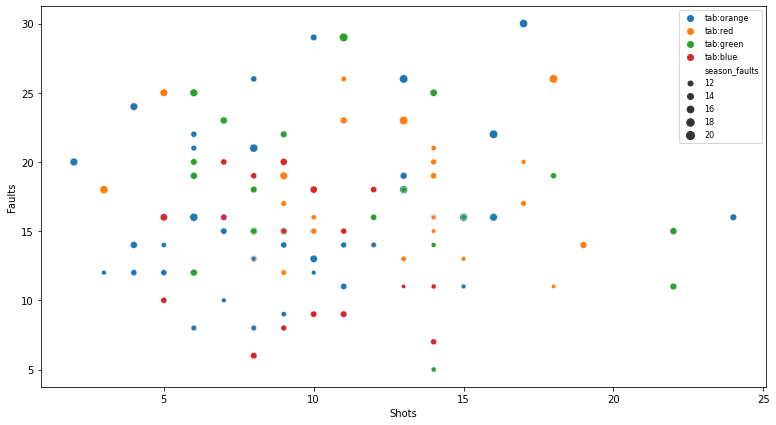

In [82]:
plt.figure(figsize=(13,7))

colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan']
dataplot.loc[:,'_color_plot'] = dataplot.cluster.map(dict(zip(sorted(dataplot.cluster.unique()), colors)))
dataplot.loc[:,'_label_plot'] = dataplot.cluster.map(dict(zip(sorted(dataplot.cluster.unique()), ['14º-20º','8º-13º','4º-7º','1º-3º'])))

p = sns.scatterplot(data=dataplot,x='shots',y='faults',hue='_color_plot',size='season_faults',label='_label_plot')

# handles, labels = p.get_legend_handles_labels()
leg = plt.legend(prop={'size':8})

plt.xlabel('Shots'), plt.ylabel('Faults')
plt.show()

In [92]:
# partidos que pierde o empata el barcelona
dataplot = bcn_nogana[(bcn_nogana.res_bcn==0) & (bcn_nogana.team !='Barcelona')]
dataplot.loc[:,'_sizeref'] = dataplot["season_faults"]**3 / 20
dataplot.loc[:,'Position:'] = dataplot.cluster.map(dict(zip(sorted(dataplot.cluster.unique()), ['14º-20º','8º-13º','4º-7º','1º-3º'])))
dataplot = dataplot.sort_values('cluster')

fig = plotly.scatter( 
                    dataplot,
                    x='shots',
                    y='faults',
                    size='_sizeref',
                    size_max=20,
                    color='Position:',
                    hover_name='team',
                    hover_data=['season','rank','season_faults']
                )
# fig.update_traces(marker={'size': 15, 'opacity': .75})
fig.update_layout(
    autosize=False,
    width=1000,
    height=600,)

fig.show()
# fig.write_image(path_eda+'scatter_shots_faults_bcnnogana.jpeg',scale=3)

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



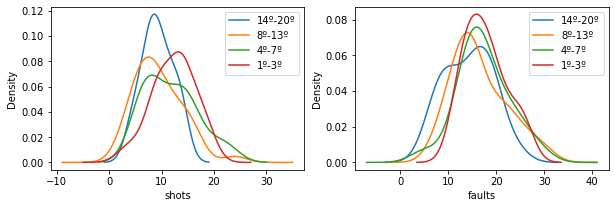

In [108]:
fig = plt.figure(figsize=(10,3))

fig.add_subplot(1,2,1)
ft = 'shots'
for p in dataplot['Position:'].unique():
    mask = dataplot['Position:']==p
    dataplot[mask][ft].plot(kind='kde',label=p)
plt.xlabel(ft)
plt.legend()

fig.add_subplot(1,2,2)
ft = 'faults'
for p in dataplot['Position:'].unique():
    mask = dataplot['Position:']==p
    dataplot[mask][ft].plot(kind='kde',label=p)
plt.xlabel(ft)
plt.legend()

fig.savefig(path_eda+'dist_shots_faults_bcnnogana.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Distribution: faults depending the ranking

In [125]:
spanish_faults = data_melted[data_melted.Div=='SP1'].sort_values('rank')
spanish_faults['rank_bin'] = pd.cut(spanish_faults['rank'],[0,4,8,15,20], labels=['1º - 3º','4º - 7º','8º - 14º','15º - 20º'])
spanish_faults 

,matchId,season,Date,Div,side,team,shots,faults,cluster,rank,season_faults,rank_bin
15926,13131,2007-08,2007-12-08,SP1,AwayTeam,Real Madrid,15.0,21.0,3,1.0,16.105263,1º - 3º
21381,15856,2014-15,2015-02-01,SP1,HomeTeam,Barcelona,19.0,10.0,3,1.0,9.710526,1º - 3º
21382,15876,2014-15,2015-02-15,SP1,HomeTeam,Barcelona,18.0,6.0,3,1.0,9.710526,1º - 3º
21383,15883,2014-15,2015-02-21,SP1,HomeTeam,Barcelona,11.0,9.0,3,1.0,9.710526,1º - 3º
21384,15907,2014-15,2015-03-08,SP1,HomeTeam,Barcelona,19.0,13.0,3,1.0,9.710526,1º - 3º
...,...,...,...,...,...,...,...,...,...,...,...,...
21755,15724,2014-15,2014-10-18,SP1,HomeTeam,Cordoba,8.0,16.0,0,20.0,13.000000,15º - 20º
21756,15733,2014-15,2014-10-25,SP1,HomeTeam,Cordoba,7.0,13.0,0,20.0,13.000000,15º - 20º
21757,15751,2014-15,2014-11-07,SP1,HomeTeam,Cordoba,14.0,10.0,0,20.0,13.000000,15º - 20º
25798,18303,2020-21,2021-05-22,SP1,HomeTeam,Eibar,17.0,11.0,0,20.0,13.000000,15º - 20º


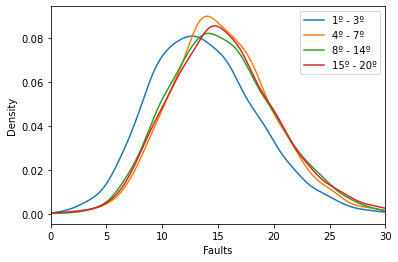

In [134]:
for rank in spanish_faults['rank_bin'].unique():
    mask = spanish_faults['rank_bin']==rank
    spanish_faults[mask].faults.plot(kind='kde',label=rank)

plt.legend()
plt.xlim(0,30)
plt.xlabel('Faults')
plt.savefig(path_eda+'dist_faults_rank_laliga.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Time Series: evolucion estilo de juego del Atalanta

In [11]:
def formatDate(strdate):
    try: date = datetime.strptime(strdate, "%d/%m/%y").date()
    except: date = datetime.strptime(strdate, "%d/%m/%Y").date()
    return date

In [6]:
data = pd.read_csv(path_rawdata+'fdata_allseasons.csv',sep=';',decimal=',')
data['matchId'] = data.index
mask = data.Date.isna() == False
data = data[mask]
data['season'] = data.season.map(str_season)
data['Date']   = data.Date.apply(formatDate)
data

c:\Users\GuillemUPV\Anaconda3\envs\tfg\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,16,17,22,23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HF,AF,HO,AO,HY,AY,HR,AR,season,matchId
0,E0,2000-08-19,Charlton,Man City,4.0,0.0,H,2.0,0.0,H,...,13.0,12.0,8.0,6.0,1.0,2.0,0.0,0.0,2000-01,0
1,E0,2000-08-19,Chelsea,West Ham,4.0,2.0,H,1.0,0.0,H,...,19.0,14.0,2.0,3.0,1.0,2.0,0.0,0.0,2000-01,1
2,E0,2000-08-19,Coventry,Middlesbrough,1.0,3.0,A,1.0,1.0,D,...,15.0,21.0,1.0,3.0,5.0,3.0,1.0,0.0,2000-01,2
3,E0,2000-08-19,Derby,Southampton,2.0,2.0,D,1.0,2.0,A,...,11.0,13.0,0.0,2.0,1.0,1.0,0.0,0.0,2000-01,3
4,E0,2000-08-19,Leeds,Everton,2.0,0.0,H,2.0,0.0,H,...,21.0,20.0,6.0,1.0,1.0,3.0,0.0,0.0,2000-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49493,F1,2000-05-13,Nancy,Auxerre,2.0,0.0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-00,49493
49494,F1,2000-05-13,Rennes,Metz,2.0,0.0,H,0.0,0.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-00,49494
49495,F1,2000-05-13,Sedan,Marseille,2.0,2.0,D,1.0,1.0,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-00,49495
49496,F1,2000-05-13,St Etienne,Monaco,3.0,1.0,H,3.0,1.0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-00,49496


In [19]:
def melt_columns(df: pd.DataFrame, id_cols: list, pairs: list, names: list) -> pd.DataFrame:
    res = pd.concat([df[id_cols],df[id_cols]],axis=0,ignore_index=True)
    res.columns = id_cols
    print(res.columns)
    for n,p in zip(names,pairs):
        df_melted = df.melt(id_cols,value_vars=p,var_name='side',value_name=n).drop([*id_cols,'side'],axis=1)
        res = pd.concat([res,df_melted],axis=1)
        res.columns = [*res.columns[:-1],n]
    print(res.columns)
    return res

In [8]:
timeseries_cols = ['scored','received','faults','yellowcards']

data_melted = melt_columns(
                data.reset_index(),
                id_cols=['matchId','season','Date','Div'],
                pairs=[('HomeTeam','AwayTeam'),('FTHG','FTAG'),('FTAG','FTHG'),('HF','AF'),('HY','AY')], 
                names=['team',*timeseries_cols]
            )

data_melted

Index(['matchId', 'season', 'Date', 'Div'], dtype='object')


,matchId,season,Date,Div,team,scored,received,faults,yellowcards
0,0,2000-01,2000-08-19,E0,Charlton,4.0,0.0,13.0,1.0
1,1,2000-01,2000-08-19,E0,Chelsea,4.0,2.0,19.0,1.0
2,2,2000-01,2000-08-19,E0,Coventry,1.0,3.0,15.0,5.0
3,3,2000-01,2000-08-19,E0,Derby,2.0,2.0,11.0,1.0
4,4,2000-01,2000-08-19,E0,Leeds,2.0,0.0,21.0,1.0
...,...,...,...,...,...,...,...,...,...
90761,49493,1999-00,2000-05-13,F1,Auxerre,0.0,2.0,NaN,NaN
90762,49494,1999-00,2000-05-13,F1,Metz,0.0,2.0,NaN,NaN
90763,49495,1999-00,2000-05-13,F1,Marseille,2.0,2.0,NaN,NaN
90764,49496,1999-00,2000-05-13,F1,Monaco,1.0,3.0,NaN,NaN


In [12]:
mask = data_melted.team=='Atalanta'
data_atalanta = data_melted[mask].sort_values('Date')
data_atalanta

mask = data_melted.team=='Getafe'
data_getafe = data_melted[mask].sort_values('Date')
data_getafe

mask = data_melted.team=='Schalke 04'
data_juve = data_melted[mask].sort_values('Date')
data_juve

,matchId,season,Date,Div,team,scored,received,faults,yellowcards
71624,27634,1993-94,1993-08-07,D1,Schalke 04,0.0,3.0,NaN,NaN
26250,27643,1993-94,1993-08-14,D1,Schalke 04,1.0,0.0,NaN,NaN
71640,27650,1993-94,1993-08-21,D1,Schalke 04,1.0,4.0,NaN,NaN
26268,27661,1993-94,1993-08-28,D1,Schalke 04,1.0,2.0,NaN,NaN
71659,27669,1993-94,1993-09-01,D1,Schalke 04,2.0,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
26195,27588,2020-21,2021-04-11,D1,Schalke 04,1.0,0.0,10.0,0.0
71583,27593,2020-21,2021-04-17,D1,Schalke 04,0.0,4.0,12.0,1.0
71591,27601,2020-21,2021-04-20,D1,Schalke 04,0.0,1.0,12.0,5.0
71609,27619,2020-21,2021-05-08,D1,Schalke 04,2.0,4.0,12.0,2.0


In [13]:
def window_columns(df: pd.DataFrame, cols: list, n: str):
    for c in cols:
        df[f'{c}_{n}'] = df.rolling(window=n,on='Date',min_periods=15,center=True)[c].mean()
    return df    

In [14]:
# windowing atalanta games
n = 38
mask_yellowcards = data_atalanta.yellowcards.isnull() == False
data_atalanta = window_columns(data_atalanta,cols=timeseries_cols,n=n)[mask_yellowcards]
data_atalanta

data_getafe = window_columns(data_getafe,cols=timeseries_cols,n=n)
data_getafe

mask_yellowcards = data_juve.yellowcards.isnull() == False
data_juve = window_columns(data_juve,cols=timeseries_cols,n=n)[mask_yellowcards]
data_juve

,matchId,season,Date,Div,team,scored,received,faults,yellowcards,scored_38,received_38,faults_38,yellowcards_38
20446,21839,2000-01,2000-08-13,D1,Schalke 04,2.0,1.0,15.0,2.0,1.578947,1.157895,17.052632,2.052632
65838,21848,2000-01,2000-08-20,D1,Schalke 04,4.0,0.0,10.0,3.0,1.605263,1.263158,17.400000,2.000000
20459,21852,2000-01,2000-09-05,D1,Schalke 04,3.0,0.0,16.0,0.0,1.657895,1.236842,17.666667,2.000000
65850,21860,2000-01,2000-09-09,D1,Schalke 04,1.0,1.0,10.0,3.0,1.631579,1.263158,17.727273,2.000000
20482,21875,2000-01,2000-09-17,D1,Schalke 04,1.0,1.0,23.0,2.0,1.552632,1.236842,17.739130,2.086957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26195,27588,2020-21,2021-04-11,D1,Schalke 04,1.0,0.0,10.0,0.0,0.666667,2.416667,12.333333,2.208333
71583,27593,2020-21,2021-04-17,D1,Schalke 04,0.0,4.0,12.0,1.0,0.652174,2.347826,12.260870,2.173913
71591,27601,2020-21,2021-04-20,D1,Schalke 04,0.0,1.0,12.0,5.0,0.681818,2.318182,12.045455,2.181818
71609,27619,2020-21,2021-05-08,D1,Schalke 04,2.0,4.0,12.0,2.0,0.619048,2.333333,12.000000,2.095238


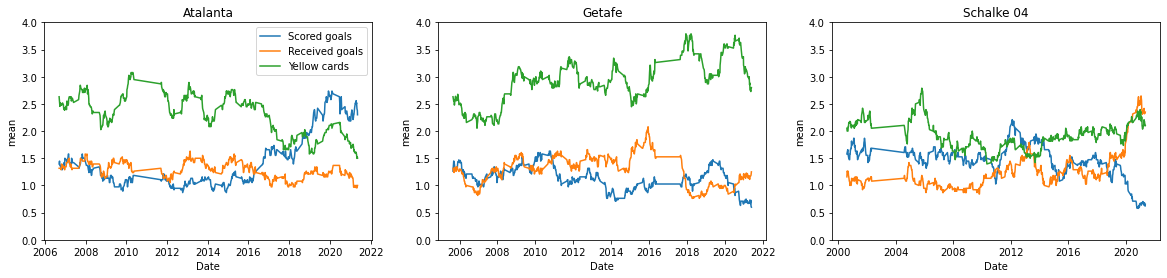

In [15]:
plt.figure(figsize=(20,4))

ax = plt.subplot(1,3,1)
ax.set_ylim(0,4)
ax.set_title('Atalanta')
ax.set_ylabel('mean')
sns.lineplot(data=data_atalanta,x='Date',y=f'scored_{n}',label='Scored goals')
sns.lineplot(data=data_atalanta,x='Date',y=f'received_{n}',label='Received goals')
sns.lineplot(data=data_atalanta,x='Date',y=f'yellowcards_{n}',label='Yellow cards')

ax = plt.subplot(1,3,2)
ax.set_ylim(0,4)
ax.set_ylabel('mean')
ax.set_title('Getafe')
sns.lineplot(data=data_getafe,x='Date',y=f'scored_{n}')
sns.lineplot(data=data_getafe,x='Date',y=f'received_{n}')
sns.lineplot(data=data_getafe,x='Date',y=f'yellowcards_{n}')

ax = plt.subplot(1,3,3)
ax.set_ylim(0,4)
ax.set_ylabel('mean')
ax.set_title('Schalke 04')
sns.lineplot(data=data_juve,x='Date',y=f'scored_{n}')
sns.lineplot(data=data_juve,x='Date',y=f'received_{n}')
sns.lineplot(data=data_juve,x='Date',y=f'yellowcards_{n}')

plt.savefig(path_eda+'timeseries_goals_faults_3teams.jpg',format='jpg', dpi=200, bbox_inches='tight')

### DATASET ANALYSIS

##### Derby Features

In [68]:
data = pd.read_csv(path_rawdata+'historical_goals_longterm.csv',sep=';',decimal=',')
data['matchId'] = data.index
mask = data.Date.isna() == False
data = data[mask]
data['season'] = data.season.map(str_season)
data['Date']   = data.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d").date())
data['FTR'] = data.FTR.map({0:'Draw',1:'Home win',2:'Away win'})
data

,aux,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,IdH,...,derby_points_5_home,derby_Scored_5_away,derby_Side_5_away,derby_points_5_away,derby_Scored_10_home,derby_Side_10_home,derby_points_10_home,derby_Scored_10_away,derby_Side_10_away,derby_points_10_away
0,0,E0,2000-08-19,Charlton,Man City,4.0,0.0,Home win,2000-01,4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,2000-08-19,Chelsea,West Ham,4.0,2.0,Home win,2000-01,1610,...,1.00,7.0,0.0,1.6,9.0,7.0,1.142857,9.0,0.0,1.571429
2,2,E0,2000-08-19,Coventry,Middlesbrough,1.0,3.0,Away win,2000-01,4001,...,0.00,10.0,0.0,3.0,1.0,4.0,0.000000,10.0,0.0,3.000000
3,3,E0,2000-08-19,Derby,Southampton,2.0,2.0,Draw,2000-01,4002,...,1.75,6.0,0.0,1.0,7.0,4.0,1.750000,6.0,0.0,1.000000
4,4,E0,2000-08-19,Leeds,Everton,2.0,0.0,Home win,2000-01,4003,...,0.60,8.0,0.0,1.8,5.0,7.0,0.571429,12.0,0.0,1.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,49493,F1,2000-05-13,Nancy,Auxerre,2.0,0.0,Home win,1999-00,4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45379,49494,F1,2000-05-13,Rennes,Metz,2.0,0.0,Home win,1999-00,3774,...,2.00,2.0,2.0,0.5,3.0,0.0,2.000000,2.0,2.0,0.500000
45380,49495,F1,2000-05-13,Sedan,Marseille,2.0,2.0,Draw,1999-00,4116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45381,49496,F1,2000-05-13,St Etienne,Monaco,3.0,1.0,Home win,1999-00,3782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
derby_cols = [ col for col in data.columns if 'derby' in col ]
data['Dif_goals'] = np.abs(data.FTHG - data.FTAG)
derby_cols = ['matchId','Div','Date','season','HomeTeam','AwayTeam','FTR','Dif_goals',*derby_cols]
derby_data = data[derby_cols]
derby_data = derby_data.round(2)
# derby_data.loc[:,'FTR'] = derby_data.FTR.apply(lambda r: str(r))
derby_data

,matchId,Div,Date,season,HomeTeam,AwayTeam,FTR,Dif_goals,derby_Scored_1_home,derby_Side_1_home,...,derby_points_5_home,derby_Scored_5_away,derby_Side_5_away,derby_points_5_away,derby_Scored_10_home,derby_Side_10_home,derby_points_10_home,derby_Scored_10_away,derby_Side_10_away,derby_points_10_away
0,0,E0,2000-08-19,2000-01,Charlton,Man City,Home win,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,2000-08-19,2000-01,Chelsea,West Ham,Home win,2.0,0.0,1.0,...,1.00,7.0,0.0,1.6,9.0,7.0,1.14,9.0,0.0,1.57
2,2,E0,2000-08-19,2000-01,Coventry,Middlesbrough,Away win,2.0,0.0,1.0,...,0.00,10.0,0.0,3.0,1.0,4.0,0.00,10.0,0.0,3.00
3,3,E0,2000-08-19,2000-01,Derby,Southampton,Draw,0.0,3.0,1.0,...,1.75,6.0,0.0,1.0,7.0,4.0,1.75,6.0,0.0,1.00
4,4,E0,2000-08-19,2000-01,Leeds,Everton,Home win,2.0,4.0,1.0,...,0.60,8.0,0.0,1.8,5.0,7.0,0.57,12.0,0.0,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,45378,F1,2000-05-13,1999-00,Nancy,Auxerre,Home win,2.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45379,45379,F1,2000-05-13,1999-00,Rennes,Metz,Home win,2.0,1.0,0.0,...,2.00,2.0,2.0,0.5,3.0,0.0,2.00,2.0,2.0,0.50
45380,45380,F1,2000-05-13,1999-00,Sedan,Marseille,Draw,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45381,45381,F1,2000-05-13,1999-00,St Etienne,Monaco,Home win,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
bins = 7

bins_labesl = np.linspace(0,3,bins)
bins_labesl2 = [*bins_labesl[1:],""]
labels = list(map(lambda x: ' - '.join([str(x[0]),str(x[1])]),(zip(bins_labesl,bins_labesl2))))

In [87]:
def bin_column(col, bins ,labels):
    assert len(labels) == bins
    return pd.cut(col,bins=bins,labels=labels)

derby_data['derby_points_10_home'] = bin_column(derby_data.derby_points_10_home, bins, labels)
derby_data['derby_points_3_home'] = bin_column(derby_data.derby_points_3_home, bins, labels)
derby_data['derby_points_5_home'] = bin_column(derby_data.derby_points_5_home, bins, labels)
derby_data.derby_points_10_home

0              NaN
1        1.0 - 1.5
2        0.0 - 0.5
3        2.0 - 2.5
4        0.5 - 1.0
           ...    
45378          NaN
45379    2.0 - 2.5
45380          NaN
45381          NaN
45382          NaN
Name: derby_points_10_home, Length: 45383, dtype: category
Categories (7, object): ['0.0 - 0.5' < '0.5 - 1.0' < '1.0 - 1.5' < '1.5 - 2.0' < '2.0 - 2.5' < '2.5 - 3.0' < '3.0 - ']

In [88]:
# mask = derby_data.Div=='D1'
mask_date = derby_data.Date>datetime.strptime("01-07-2018","%d-%m-%Y").date()
dataplot = derby_data[mask & mask_date]

In [89]:
cols_x, cols_y = 'derby_points_3_home', 'derby_points_10_home'
dataplot = derby_data[mask & mask_date]
plotly.scatter(dataplot, x=cols_x, y=cols_y, hover_data=['HomeTeam','AwayTeam','season'], color='FTR', size='Dif_goals')

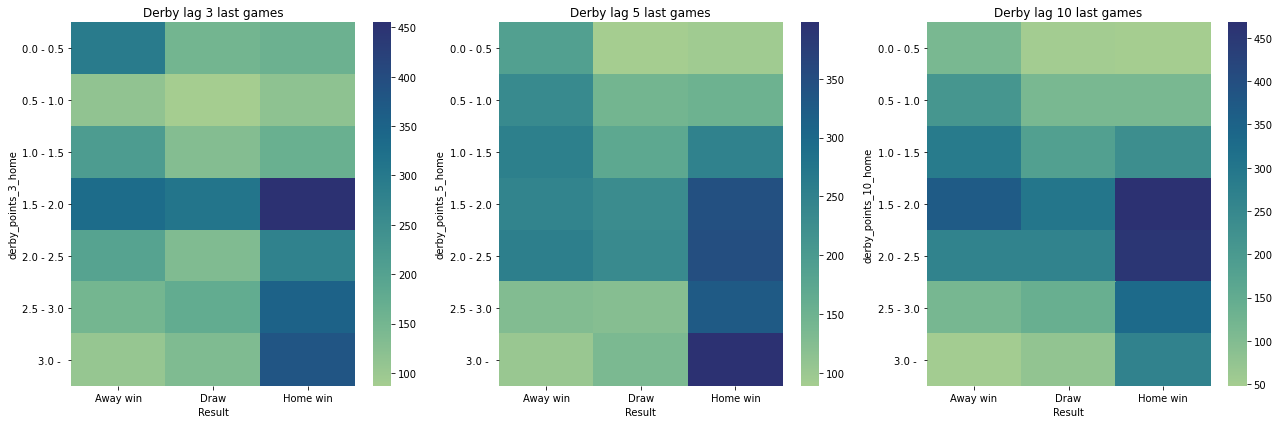

In [100]:
fig = plt.figure(figsize=(18,6))
ax = fig.add_subplot(1,3,1)
d = dataplot.groupby(['derby_points_3_home','FTR']).matchId.count().unstack().fillna(0).astype(int)
sns.heatmap(d,cmap='crest')
ax.set_title('Derby lag 3 last games')
ax.set_xlabel('Result')
ax.set_yticklabels(labels,rotation=0)

ax = fig.add_subplot(1,3,2)
d = dataplot.groupby(['derby_points_5_home','FTR']).matchId.count().unstack().fillna(0).astype(int)
sns.heatmap(d,cmap='crest')
ax.set_title('Derby lag 5 last games')
ax.set_xlabel('Result')
ax.set_yticklabels(labels,rotation=0)

ax = fig.add_subplot(1,3,3)
d = dataplot.groupby(['derby_points_10_home','FTR']).matchId.count().unstack().fillna(0).astype(int)
sns.heatmap(d,cmap='crest')
ax.set_title('Derby lag 10 last games')
ax.set_xlabel('Result')
ax.set_yticklabels(labels,rotation=0)

fig.tight_layout()
fig.savefig(path_eda+'heatmap_derby.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Time Series: lags of a team

In [25]:
data = pd.read_csv(path_rawdata+'historical_goals_longterm.csv',sep=';',decimal=',')
data['matchId'] = data.index
mask = data.Date.isna() == False
data = data[mask]
data['season'] = data.season.map(str_season)
data['Date']   = data.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d").date())
data['FTR'] = data.FTR.map({0:'Draw',1:'Home win',2:'Away win'})
data.shape

(45383, 92)

In [26]:
columns = [col for col in data.columns if ('points' in col) and ('D_' in col)]
key_cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'season', 'matchId']
data_lags = data[[*key_cols,*columns]]
data_lags.shape, data_lags.columns

((45383, 23),
 Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'season',
        'matchId', 'points_15D_home', 'points_15D_away', 'points_30D_home',
        'points_30D_away', 'points_60D_home', 'points_60D_away',
        'points_180D_home', 'points_180D_away', 'points_365D_home',
        'points_365D_away', 'points_730D_home', 'points_730D_away',
        'points_1825D_home', 'points_1825D_away'],
       dtype='object'))

In [39]:
timeseries_cols = ['current match','15D','30D','60D','180D','365D','730D','1825D']
cols2melt = [('HomeTeam','AwayTeam'),('FTHG','FTAG'),('points_15D_home', 'points_15D_away'),('points_30D_home',
        'points_30D_away'),('points_60D_home', 'points_60D_away'),('points_180D_home', 'points_180D_away'),('points_365D_home',
        'points_365D_away'), ('points_730D_home','points_730D_away'),('points_1825D_home', 'points_1825D_away')]

data_melted = melt_columns(
                data.sort_values('Date'),
                id_cols=['matchId','season','Date','Div'],
                pairs=cols2melt, 
                names=['team',*timeseries_cols]
            )
data_melted.shape

Index(['matchId', 'season', 'Date', 'Div'], dtype='object')
Index(['matchId', 'season', 'Date', 'Div', 'team', 'current match', '15D',
       '30D', '60D', '180D', '365D', '730D', '1825D'],
      dtype='object')


(90766, 13)

In [42]:
data_melted[mask_team]

,matchId,season,Date,Div,team,current match,15D,30D,60D,180D,365D,730D,1825D
99,35352,1993-94,1993-08-29,I1,Atalanta,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
162,35370,1993-94,1993-09-08,I1,Atalanta,2.0,1.500000,1.5,1.500000,NaN,NaN,NaN,NaN
231,35388,1993-94,1993-09-19,I1,Atalanta,0.0,1.000000,1.5,1.500000,NaN,NaN,NaN,NaN
295,35406,1993-94,1993-10-03,I1,Atalanta,1.0,0.500000,0.8,1.166667,NaN,NaN,NaN,NaN
407,35424,1993-94,1993-10-24,I1,Atalanta,1.0,NaN,0.0,0.875000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90373,35265,2020-21,2021-03-21,I1,Atalanta,2.0,1.500000,2.4,2.000000,1.925926,2.050000,2.053333,1.834225
90474,35291,2020-21,2021-04-11,I1,Atalanta,3.0,NaN,3.0,2.625000,1.884615,2.095238,2.067568,1.850267
90562,35311,2020-21,2021-04-22,I1,Atalanta,1.0,3.000000,3.0,2.666667,2.037037,2.136364,2.094595,1.871658
90640,35329,2020-21,2021-05-02,I1,Atalanta,1.0,2.333333,2.6,2.444444,2.074074,2.130435,2.080000,1.877005


In [82]:
data_melted[data_melted.team=='Malaga']

,matchId,season,Date,Div,team,current match,15D,30D,60D,180D,365D,730D,1825D
9267,20064,1999-00,1999-08-22,SP1,Malaga,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,20083,1999-00,1999-09-12,SP1,Malaga,3.0,NaN,1.500000,1.500000,NaN,NaN,NaN,NaN
9446,20099,1999-00,1999-09-25,SP1,Malaga,1.0,1.5,1.000000,1.500000,NaN,NaN,NaN,NaN
9520,20119,1999-00,1999-10-12,SP1,Malaga,3.0,NaN,1.250000,1.333333,NaN,NaN,NaN,NaN
9655,20149,1999-00,1999-10-30,SP1,Malaga,1.0,0.0,0.250000,0.714286,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85049,16380,2017-18,2018-03-18,SP1,Malaga,0.0,0.0,0.000000,0.222222,0.541667,0.846154,0.946667,1.131579
85111,16394,2017-18,2018-04-06,SP1,Malaga,2.0,NaN,1.333333,0.444444,0.695652,0.868421,0.946667,1.136842
85228,16422,2017-18,2018-04-19,SP1,Malaga,0.0,0.0,1.000000,0.500000,0.666667,0.789474,0.933333,1.115183
85321,16441,2017-18,2018-04-30,SP1,Malaga,1.0,1.0,1.200000,0.875000,0.666667,0.710526,0.960000,1.115183


In [96]:
year_month = data_melted.Date.apply(lambda d: 'M'.join([str(d.year),str(d.month).zfill(2)]))
data_melted['year_month'] = year_month
data_melted

,matchId,season,Date,Div,team,current match,15D,30D,60D,180D,365D,730D,1825D,year_month
0,26240,1993-94,1993-08-07,D1,M'Gladbach,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M08
1,26234,1993-94,1993-08-07,D1,Bayern Munich,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M08
2,26235,1993-94,1993-08-07,D1,Dortmund,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M08
3,26236,1993-94,1993-08-07,D1,Duisburg,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M08
4,26237,1993-94,1993-08-07,D1,FC Koln,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993M08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90761,17612,2020-21,2021-05-23,SP1,Getafe,0.0,1.000000,1.20,0.888889,0.892857,0.937500,1.213333,1.357616,2021M05
90762,17613,2020-21,2021-05-23,SP1,Alaves,0.0,2.333333,1.60,1.666667,1.037037,0.937500,1.026667,1.211640,2021M05
90763,44462,2020-21,2021-05-23,F1,Nimes,0.0,1.500000,1.00,0.857143,0.923077,0.945946,0.939394,1.116505,2021M05
90764,44464,2020-21,2021-05-23,F1,Lorient,1.0,1.500000,2.25,1.714286,1.269231,1.108108,NaN,1.026667,2021M05


<ipython-input-110-e03db928824e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=seasons,rotation=45)
<ipython-input-110-e03db928824e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=seasons,rotation=45)
<ipython-input-110-e03db928824e>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=seasons,rotation=45)


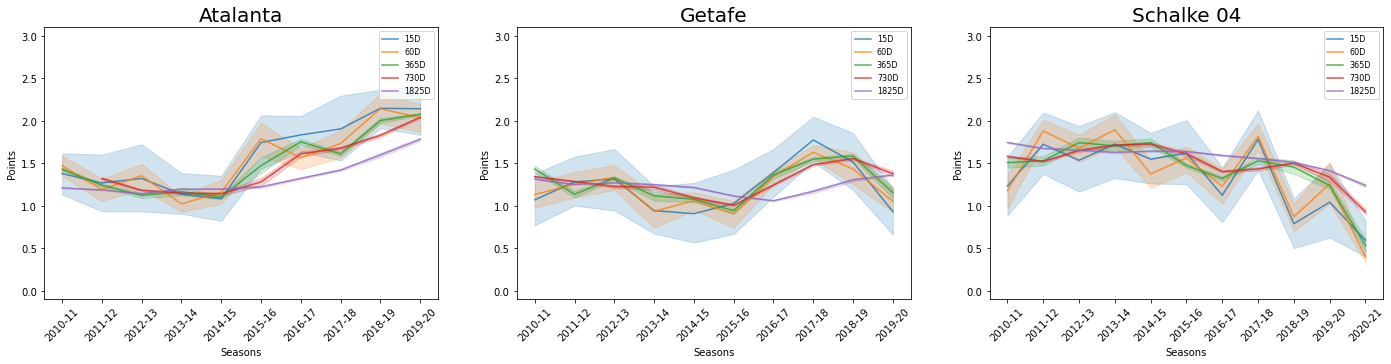

In [110]:
fig = plt.figure(figsize=(24,5))
mask_date = data_melted.Date>datetime.strptime("01-07-2010","%d-%m-%Y").date()
dataplot = data_melted[mask_date]
seasons = dataplot.season.unique()
for i,team in enumerate(['Atalanta','Getafe','Schalke 04']):
    mask_team = dataplot.team==team
    data_team = dataplot[mask_team]
    ax = fig.add_subplot(1,3,i+1)
    ax.set_title(team,fontsize=20)
    for col in ['15D', '60D', '365D', '730D', '1825D']:
        sns.lineplot(data=data_team,x='season',y=col,label=col,linewidth=1.5,alpha=.8)
    ax.legend(prop={'size':8})
    ax.set_xlabel('Seasons')
    ax.set_xticklabels(labels=seasons,rotation=45)
    ax.set_ylim(-0.1,3.1)
    ax.set_ylabel('Points')

fig.savefig(path_eda+'timeseries_lags_historical.jpg',format='jpg', dpi=200, bbox_inches='tight')

In [111]:
# import matplotlib.gridspec as gridspec
# fig = plt.figure(figsize=(10,8))
# mask_date = data_melted.Date>datetime.strptime("01-07-2010","%d-%m-%Y").date()
# dataplot = data_melted[mask_date]
# seasons = dataplot.season.unique()
# gs = gridspec.GridSpec(2,4)
# pos= [0,2,1]
# for i,team in enumerate(['Atalanta','Getafe','Schalke 04']):
#     mask_team = dataplot.team==team
#     data_team = dataplot[mask_team]
#     ax = plt.subplot(gs[int(i/2), pos[i]:(pos[i]+2)])
#     ax.set_title(team,fontsize=20)
#     for col in ['15D', '60D', '365D', '730D', '1825D']:
#         sns.lineplot(data=data_team,x='season',y=col,label=col,linewidth=1.5,alpha=.8)
#     ax.legend(prop={'size':8})
#     ax.set_xlabel('Seasons')
#     ax.set_xticklabels(labels=seasons,rotation=45)
#     ax.set_ylim(-0.1,3.1)
#     ax.set_ylabel('Points')

# fig.tight_layout()
# fig.savefig(path_eda+'timeseries_lags_historical.jpg',format='jpg', dpi=200, bbox_inches='tight')

##### Time Series: lags relationship with result

In [140]:
data = pd.read_csv(path_rawdata+'historical_goals_longterm.csv',sep=';',decimal=',')
data['matchId'] = data.index
mask = data.Date.isna() == False
data = data[mask]
data['season'] = data.season.map(str_season)
data['Date']   = data.Date.apply(lambda d: datetime.strptime(d, "%Y-%m-%d").date())
data['FTR'] = data.FTR.map({0:'Draw',1:'Home win',2:'Away win'})
data

,aux,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,IdH,...,derby_points_5_home,derby_Scored_5_away,derby_Side_5_away,derby_points_5_away,derby_Scored_10_home,derby_Side_10_home,derby_points_10_home,derby_Scored_10_away,derby_Side_10_away,derby_points_10_away
0,0,E0,2000-08-19,Charlton,Man City,4.0,0.0,Home win,2000-01,4000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,E0,2000-08-19,Chelsea,West Ham,4.0,2.0,Home win,2000-01,1610,...,1.00,7.0,0.0,1.6,9.0,7.0,1.142857,9.0,0.0,1.571429
2,2,E0,2000-08-19,Coventry,Middlesbrough,1.0,3.0,Away win,2000-01,4001,...,0.00,10.0,0.0,3.0,1.0,4.0,0.000000,10.0,0.0,3.000000
3,3,E0,2000-08-19,Derby,Southampton,2.0,2.0,Draw,2000-01,4002,...,1.75,6.0,0.0,1.0,7.0,4.0,1.750000,6.0,0.0,1.000000
4,4,E0,2000-08-19,Leeds,Everton,2.0,0.0,Home win,2000-01,4003,...,0.60,8.0,0.0,1.8,5.0,7.0,0.571429,12.0,0.0,1.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45378,49493,F1,2000-05-13,Nancy,Auxerre,2.0,0.0,Home win,1999-00,4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45379,49494,F1,2000-05-13,Rennes,Metz,2.0,0.0,Home win,1999-00,3774,...,2.00,2.0,2.0,0.5,3.0,0.0,2.000000,2.0,2.0,0.500000
45380,49495,F1,2000-05-13,Sedan,Marseille,2.0,2.0,Draw,1999-00,4116,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45381,49496,F1,2000-05-13,St Etienne,Monaco,3.0,1.0,Home win,1999-00,3782,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
columns = [col for col in data.columns if ('points' in col) and ('D_' in col)]
key_cols = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'season', 'matchId']
data_lags = data[[*key_cols,*columns]]
data_lags.shape, data_lags.columns

((45383, 23),
 Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'season',
        'matchId', 'points_15D_home', 'points_15D_away', 'points_30D_home',
        'points_30D_away', 'points_60D_home', 'points_60D_away',
        'points_180D_home', 'points_180D_away', 'points_365D_home',
        'points_365D_away', 'points_730D_home', 'points_730D_away',
        'points_1825D_home', 'points_1825D_away'],
       dtype='object'))

In [142]:
mask_date = data_lags.Date>datetime.strptime("01-07-2010","%d-%m-%Y").date()
mask = True
dataplot = data_lags[mask & mask_date]
dataplot.shape

(19915, 23)

In [148]:
cols2compare = ['points_60D_home','points_60D_away','points_730D_home','points_730D_away']
dataplot = dataplot[[*key_cols,*cols2compare]]
mask_home = (dataplot[cols2compare[0]] > dataplot[cols2compare[2]]) & (dataplot[cols2compare[0]] > 2) & (dataplot[cols2compare[2]] < 1.5)
mask_away = (dataplot[cols2compare[1]] < dataplot[cols2compare[3]]) & (dataplot[cols2compare[3]] > 2)
mask = dataplot[cols2compare[2]] < dataplot[cols2compare[3]]

In [138]:
dataplot_15d = dataplot[mask & mask_home & mask_away]

In [149]:
pd.options.display.max_rows = 68
dataplot_60d = dataplot[mask & mask_home & mask_away]
dataplot_60d

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,matchId,points_60D_home,points_60D_away,points_730D_home,points_730D_away
4208,E0,2013-09-01,Liverpool,Man United,1.0,0.0,Home win,2013-14,4208,3.000000,2.000000,1.493333,2.306667
5035,E0,2015-10-24,West Ham,Chelsea,2.0,1.0,Home win,2015-16,5035,2.333333,1.166667,1.246753,2.116883
5099,E0,2015-12-14,Leicester,Chelsea,2.0,1.0,Home win,2015-16,5099,2.428571,1.000000,1.377358,2.026316
5128,E0,2015-12-29,Leicester,Man City,0.0,0.0,Draw,2015-16,5128,2.375000,1.625000,1.410714,2.120000
5882,E0,2017-12-23,Burnley,Tottenham,0.0,3.0,Away win,2017-18,5882,2.111111,1.222222,1.285714,2.051948
6036,E0,2018-04-19,Burnley,Chelsea,1.0,2.0,Away win,2017-18,6036,2.666667,1.166667,1.295775,2.092105
6547,E0,2019-10-19,Crystal Palace,Man City,0.0,2.0,Away win,2019-20,6547,2.166667,2.000000,1.368421,2.526316
6878,E0,2020-10-17,Everton,Liverpool,2.0,2.0,Draw,2020-21,6878,3.000000,2.250000,1.430556,2.569444
6968,E0,2020-12-19,Southampton,Man City,0.0,1.0,Away win,2020-21,6968,2.125000,1.625000,1.430556,2.183099
13808,SP1,2011-05-21,Malaga,Barcelona,1.0,3.0,Away win,2010-11,13808,2.125000,1.875000,1.090909,2.506494


In [135]:
plotly.scatter(dataplot,x='points_365D_home',y='points_30D_home',color='FTR',hover_data=['HomeTeam','AwayTeam','FTHG','FTAG','season'])

In [144]:
for col in columns:
    data_lags[col] = bin_column(data_lags[col],7,labels)

<ipython-input-144-aef97f550aeb>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
from matplotlib.colors import LogNorm, Normalize

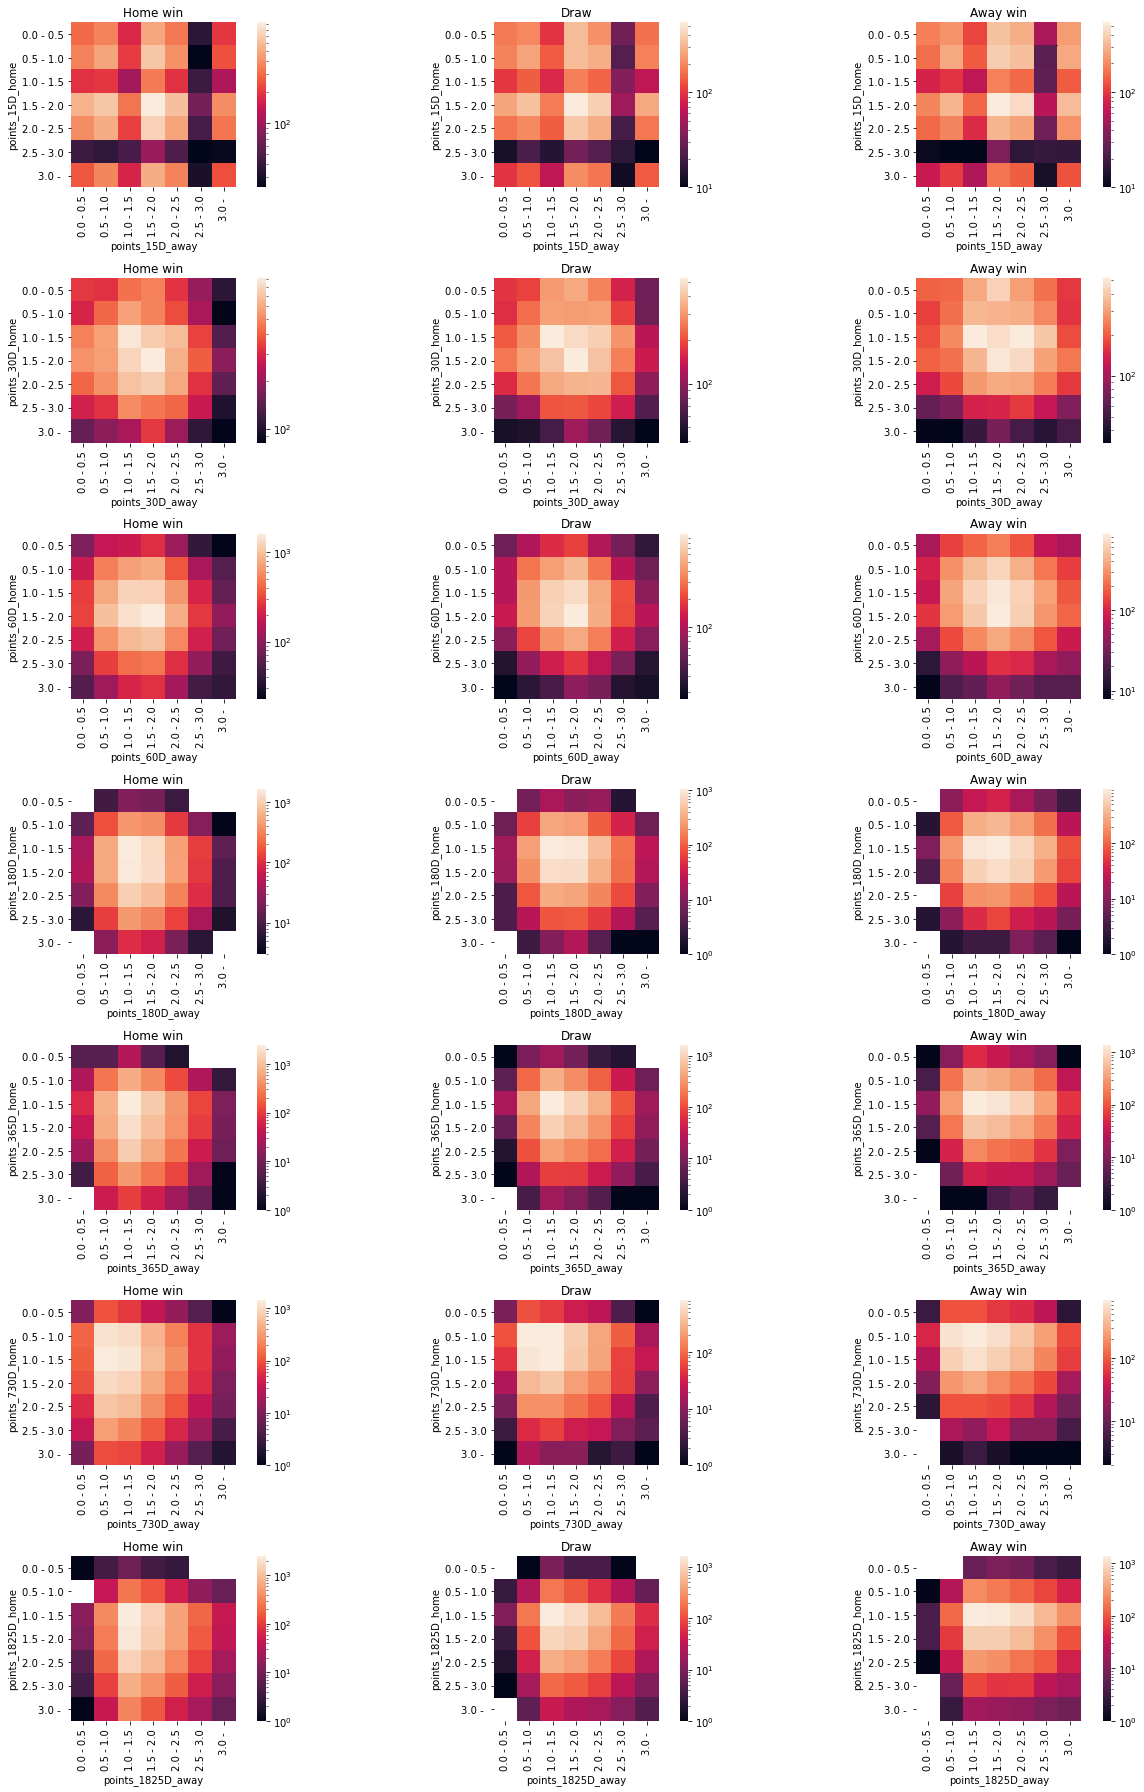

In [196]:
fig = plt.figure(figsize=(18,25))
for i,(colH,colA) in enumerate(np.array(columns).reshape(-1,2)):
    for j,res in enumerate(['Home win','Draw','Away win']):
        ax = fig.add_subplot(7,3,i*3+j+1)
        dataplot = data_lags[data_lags.FTR==res].groupby([colH,colA]).matchId.count().unstack()
        sns.heatmap(dataplot,square=True,norm=LogNorm())
        ax.set_title(res)
fig.tight_layout()
fig.savefig(path_eda+'heatmap_lags_historical.jpg',format='jpg', dpi=200, bbox_inches='tight')